Проект: Анализ данных пассажиров Титаника
Цель проекта
Исследовать, очистить и обработать данные о пассажирах Титаника, выявить ключевые факторы, влияющие на выживаемость, и визуализировать результаты.
Этапы выполнения
1. Импорт и первичный анализ данных. Exploratory Data Analysis (EDA)
• Загрузите данные из файлов train.csv, test.csv и gender_submission.csv.
 • Проведите базовое исследование структуры данных, используя методы .head(), .info() и .describe(), чтобы понять, какие столбцы содержат пропуски или выбросы.
2. Очистка данных. Data Cleaning
• Обработка пропущенных значений:
   - Столбец Age: Заполните пропуски медианным значением или средним значением в зависимости от пассажирского класса и пола.
   - Столбец Embarked: Заполните пропуски наиболее частым значением.
   - Столбец Cabin: Этот столбец может содержать много пропусков, поэтому можно либо оставить только первую букву каюты, либо удалить столбец полностью.
   - Столбец Fare: Проверьте наличие пропущенных значений и заполните их медианным значением.
 • Обработка выбросов:
   - Проверьте значения в столбцах Age и Fare на наличие аномально высоких или низких значений и решите, что с ними делать.
Embarked: обозначает порт, из которого пассажир сел на борт корабля.
C — Cherbourg (Шербур)
Q — Queenstown (Куинстаун)
S — Southampton (Саутгемптон)

3. Создание новых признаков. Feature Engineering
• Извлеките титул пассажира из столбца Name и создайте новый признак Title, который может повлиять на выживаемость.
 • Создайте признак FamilySize на основе количества родственников на борту (SibSp и Parch).
 • Создайте бинарный признак IsAlone, указывающий, путешествовал ли пассажир один.
4. Анализ и визуализация данных. Data Visualization
• Проведите анализ факторов, влияющих на выживаемость, с помощью следующих визуализаций:
   - Гистограмма выживаемости (Survived): Покажите распределение выживания по категориям (выжил / не выжил).
   - Гистограмма распределения возраста (Age): Покажите распределение возраста среди выживших и не выживших.
   - Диаграмма размаха (boxplot) для стоимости билета (Fare): Показать разброс стоимости билета в зависимости от класса (Pclass) и статуса выживаемости.
   - Столбчатая диаграмма по классу и полу (Pclass, Sex): Сравните процент выживших в разных классах для мужчин и женщин.
   - Групповая столбчатая диаграмма (barplot) для FamilySize и выживаемости: Показать влияние размера семьи на выживаемость.
   - Круговая диаграмма для пункта отправления (Embarked): Показать процент выживших и не выживших для каждого пункта отправления.
   - Диаграмма рассеяния (scatterplot): Показать взаимосвязь между возрастом и стоимостью билета, используя цвет для обозначения выживаемости (Survived).
   - Тепловая карта корреляций (heatmap): Постройте корреляционную матрицу для количественных переменных, чтобы выявить взаимосвязи между различными признаками.
5. Сортировка и группировка данных. Data Aggregation & Grouping
• Выполните группировку по таким признакам, как Pclass, Sex, Embarked и FamilySize, чтобы изучить средний показатель выживаемости для каждой группы.
 • Используйте группировку и сортировку для анализа зависимости между стоимостью билета и классом (Pclass), а также между размером семьи и выживаемостью.
6. Подготовка отчета. Report Preparation
• Оформите краткий отчет о проделанной работе с описанием подходов к очистке и обработке данных, выводами по визуализациям и выявленным факторам, влияющим на выживаемость пассажиров.
Результат
Ваш проект должен включать:
 • Очищенные данные.
 • Набор визуализаций, показывающих ключевые зависимости и выводы.
 • Описание проделанных шагов и краткий анализ результатов.

In [70]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

1. Импорт и первичный анализ данных. Exploratory Data Analysis (EDA)
• Загрузите данные из файлов train.csv, test.csv и gender_submission.csv.
 • Проведите базовое исследование структуры данных, используя методы .head(), .info() и .describe(), чтобы понять, какие столбцы содержат пропуски или выбросы.

In [71]:
train = pd.read_csv('train.csv')

In [72]:
test = pd.read_csv('test1.csv')

In [73]:
submission = pd.read_csv('gender_submission.csv')

In [74]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [78]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [79]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [80]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [81]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [82]:
submission.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


2. Очистка данных. Data Cleaning

• Обработка пропущенных значений:
   - Столбец Age: Заполните пропуски медианным значением или средним значением в зависимости от пассажирского класса и пола.
   - Столбец Embarked: Заполните пропуски наиболее частым значением.
   - Столбец Cabin: Этот столбец может содержать много пропусков, поэтому можно либо оставить только первую букву каюты, либо удалить столбец полностью.
   - Столбец Fare: Проверьте наличие пропущенных значений и заполните их медианным значением. 
   
• Обработка выбросов:
   - Проверьте значения в столбцах Age и Fare на наличие аномально высоких или низких значений и решите, что с ними делать.
Embarked: обозначает порт, из которого пассажир сел на борт корабля.
C — Cherbourg (Шербур)
Q — Queenstown (Куинстаун)
S — Southampton (Саутгемптон)

In [83]:
test_merged = pd.merge(submission, test, how='outer')

In [84]:
alldata = pd.merge(test_merged, train, how='outer')

In [85]:
alldata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
alldata.shape

(1309, 12)

In [87]:
alldata['Age'] = alldata.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
alldata['Embarked'].fillna(alldata['Embarked'].mode()[0])
alldata['Fare'].fillna(alldata['Fare'].median())
alldata['Fare']=alldata['Fare'].fillna(alldata['Fare'].median())
alldata.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

• Обработка выбросов:
   - Проверьте значения в столбцах Age и Fare на наличие аномально высоких или низких значений и решите, что с ними делать.
Embarked: обозначает порт, из которого пассажир сел на борт корабля.
C — Cherbourg (Шербур)
Q — Queenstown (Куинстаун)
S — Southampton (Саутгемптон)

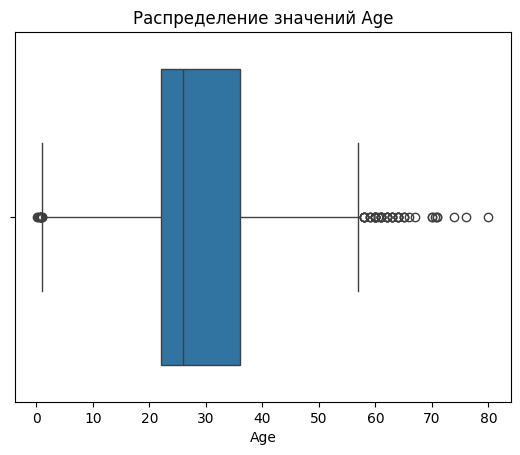

In [88]:
# Проверка распределения значений Age
sns.boxplot(x=alldata['Age'])
plt.title('Распределение значений Age') 
plt.show()

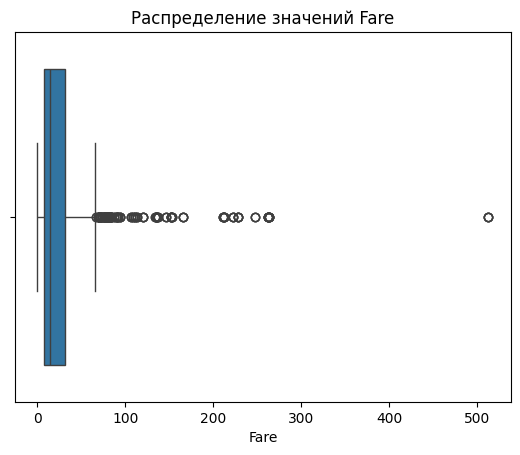

In [89]:
# Проверка распределения значений Fare
sns.boxplot(x=alldata['Fare'])
plt.title('Распределение значений Fare') 
plt.show()

In [90]:
# Обработка выбросов в столбце Age
Q1 = alldata['Age'].quantile(0.25)
Q3 = alldata['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_age = Q1 - 1.5 * IQR
upper_bound_age = Q3 + 1.5 * IQR
alldata = alldata[(alldata['Age'] >= lower_bound_age) & (alldata['Age'] <= upper_bound_age)]
alldata['Age'].describe()

count    1248.000000
mean       28.198718
std        11.301571
min         1.000000
25%        22.000000
50%        25.000000
75%        35.250000
max        57.000000
Name: Age, dtype: float64

3. Создание новых признаков. Feature Engineering
• Извлеките титул пассажира из столбца Name и создайте новый признак Title, который может повлиять на выживаемость.
 • Создайте признак FamilySize на основе количества родственников на борту (SibSp и Parch).
 • Создайте бинарный признак IsAlone, указывающий, путешествовал ли пассажир один.

In [91]:
# Извлечение титулов из имени пассажира

alldata['Title'] = alldata['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
print(alldata['Title'].value_counts())

Title
Mr              726
Miss            253
Mrs             184
Master           53
Rev               8
Dr                8
Col               3
Major             2
Ms                2
Mlle              2
Don               1
Mme               1
Lady              1
Sir               1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64


In [92]:
# Создание признака FamilySize 
alldata['FamilySize'] = alldata['SibSp'] + alldata['Parch'] + 1 

# Просмотр первых 5 значений нового признака FamilySize 
print(alldata[['SibSp', 'Parch', 'FamilySize']].head())

   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


In [93]:
# Создание бинарного признака IsAlone 
alldata['IsAlone'] = 0 # Изначально считаем, что все путешествовали не одни 
alldata.loc[alldata['FamilySize'] == 1, 'IsAlone'] = 1 # Если FamilySize == 1, значит человек одинок 
# Просмотр первых 5 значений нового признака IsAlone 
print(alldata[['FamilySize', 'IsAlone']].head())

   FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1


4. Анализ и визуализация данных. Data Visualization
• Проведите анализ факторов, влияющих на выживаемость, с помощью следующих визуализаций:
   - Гистограмма выживаемости (Survived): Покажите распределение выживания по категориям (выжил / не выжил).
   - Гистограмма распределения возраста (Age): Покажите распределение возраста среди выживших и не выживших.
   - Диаграмма размаха (boxplot) для стоимости билета (Fare): Показать разброс стоимости билета в зависимости от класса (Pclass) и статуса выживаемости.
   - Столбчатая диаграмма по классу и полу (Pclass, Sex): Сравните процент выживших в разных классах для мужчин и женщин.
   - Групповая столбчатая диаграмма (barplot) для FamilySize и выживаемости: Показать влияние размера семьи на выживаемость.
   - Круговая диаграмма для пункта отправления (Embarked): Показать процент выживших и не выживших для каждого пункта отправления.
   - Диаграмма рассеяния (scatterplot): Показать взаимосвязь между возрастом и стоимостью билета, используя цвет для обозначения выживаемости (Survived).
   - Тепловая карта корреляций (heatmap): Постройте корреляционную матрицу для количественных переменных, чтобы выявить взаимосвязи между различными признаками.

- Гистограмма выживаемости (Survived): Покажите распределение выживания по категориям (выжил / не выжил).

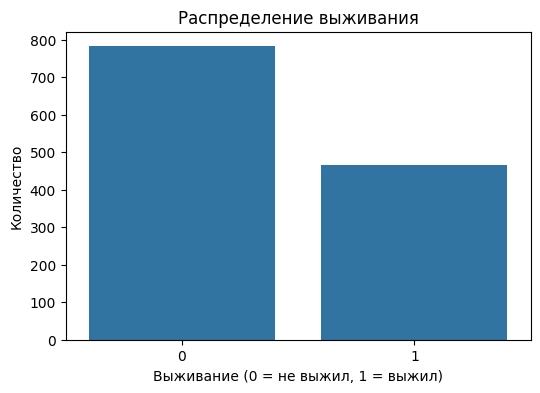

In [94]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=alldata)
plt.title('Распределение выживания')
plt.xlabel('Выживание (0 = не выжил, 1 = выжил)')
plt.ylabel('Количество')
plt.show()

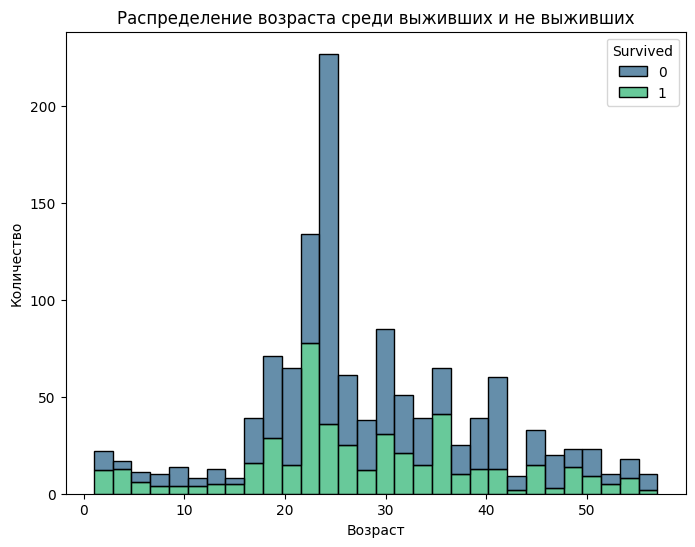

In [95]:
# 2. Гистограмма распределения возраста (Age) среди выживших и не выживших
plt.figure(figsize=(8, 6))
sns.histplot(data=alldata, x='Age', hue='Survived', multiple='stack', kde=False, bins=30, palette='viridis')
plt.title('Распределение возраста среди выживших и не выживших')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

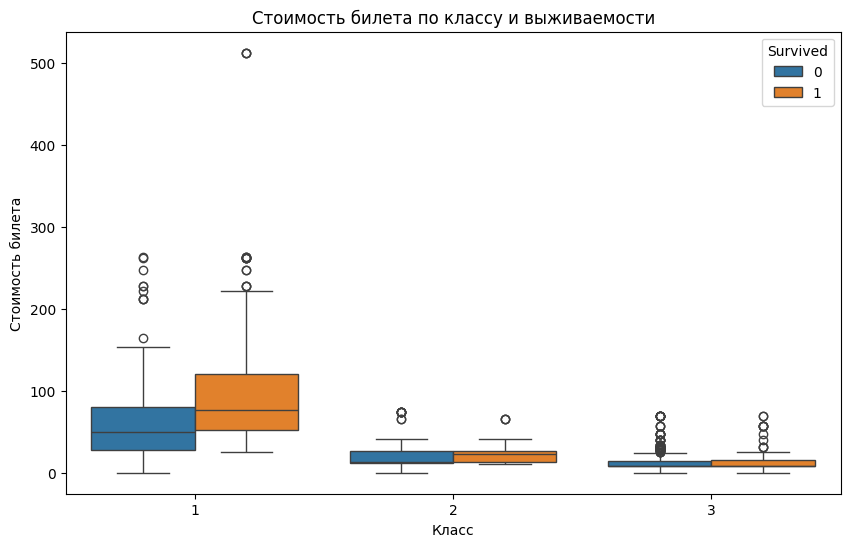

In [96]:
# 3. Диаграмма размаха (boxplot) для стоимости билета (Fare) в зависимости от класса (Pclass) и статуса выживаемости
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=alldata)
plt.title('Стоимость билета по классу и выживаемости')
plt.xlabel('Класс')
plt.ylabel('Стоимость билета')
plt.show()

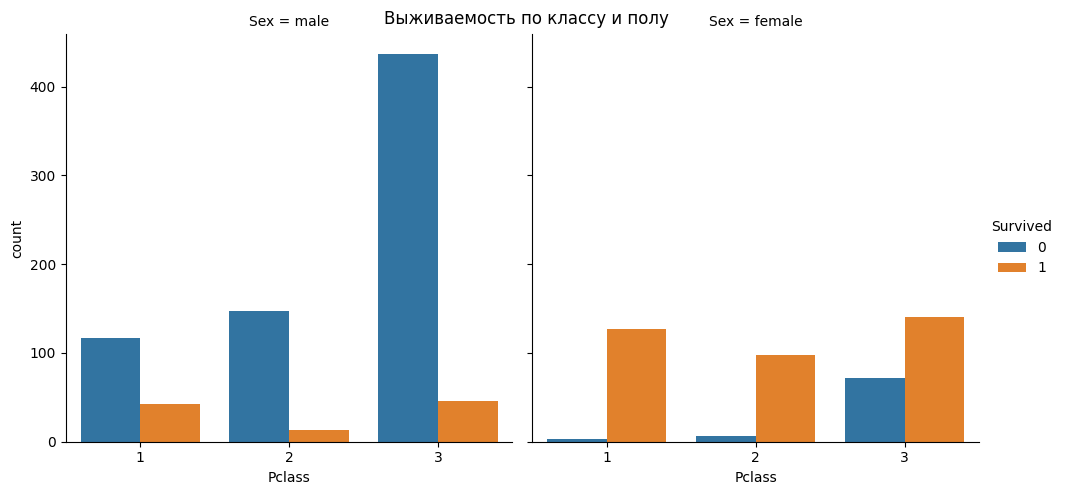

In [97]:
# 4.Столбчатая диаграмма выживаемости по классу и полу 
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=alldata) 
plt.suptitle('Выживаемость по классу и полу')
plt.show()

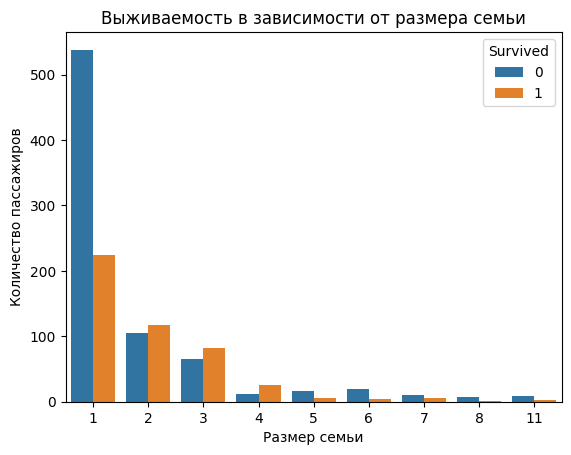

In [98]:
# 5.Групповая столбчатая диаграмма для FamilySize и выживаемости 
sns.countplot(x='FamilySize', hue='Survived', data=alldata)
plt.title('Выживаемость в зависимости от размера семьи') 
plt.xlabel('Размер семьи') 
plt.ylabel('Количество пассажиров')
plt.show()

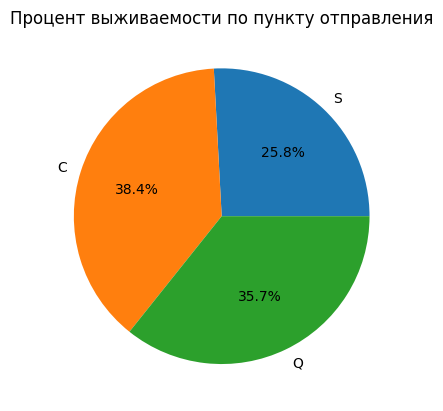

In [99]:
# 6. Круговая диаграмма для пункта отправления
embarked_survived = alldata[alldata['Survived'] == 1]['Embarked'].value_counts()
embarked_total = alldata['Embarked'].value_counts()
embarked_survival_rate = (embarked_survived / embarked_total) * 100

plt.pie(embarked_survival_rate, labels=embarked_survival_rate.index, autopct='%1.1f%%')
plt.title('Процент выживаемости по пункту отправления')
plt.show()

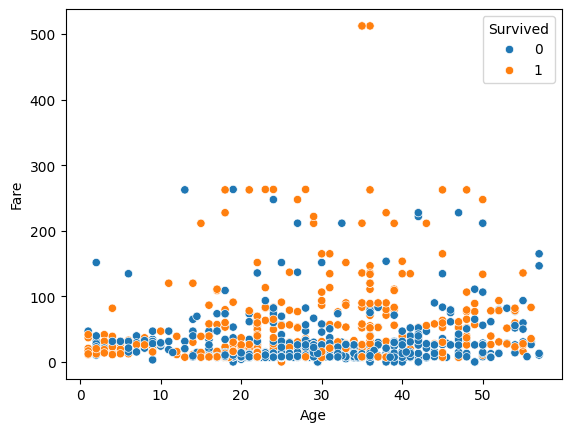

In [100]:
# 7. Диаграмма рассеяния зависимости возраста и стоимости билета от выживаемости
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=alldata)
plt.show()

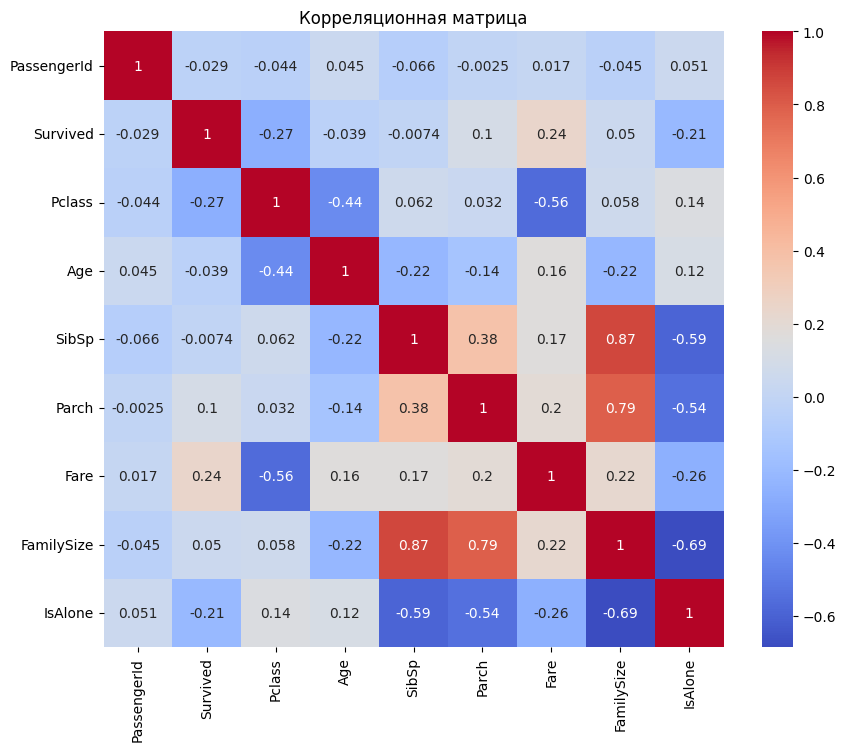

In [101]:
# 8. Тепловая карта корреляций
plt.figure(figsize=(10, 8))
numeric = alldata.select_dtypes(include=[float, int])
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

5. Сортировка и группировка данных. Data Aggregation & Grouping

• Выполните группировку по таким признакам, как Pclass, Sex, Embarked и FamilySize, чтобы изучить средний показатель выживаемости для каждой группы.

 • Используйте группировку и сортировку для анализа зависимости между стоимостью билета и классом (Pclass), а также между размером семьи и выживаемостью.

In [102]:
# Группировки по классу: 
# (Pclass)
pclass = alldata.groupby('Pclass')['Survived'].mean().reset_index()
pclass

,Pclass,Survived
0,1,0.584775
1,2,0.420455
2,3,0.267626


In [103]:
# (Sex)
sex = alldata.groupby('Sex')['Survived'].mean().reset_index()
sex

,Sex,Survived
0,female,0.818386
1,male,0.125935


In [104]:
# (Embarked)
embarked = alldata.groupby('Embarked')['Survived'].mean().reset_index()
embarked

,Embarked,Survived
0,C,0.488189
1,Q,0.453782
2,S,0.328375


In [105]:
# (FamilySize)
familySize = alldata.groupby('FamilySize')['Survived'].mean().reset_index()
familySize

,FamilySize,Survived
0,1,0.293963
1,2,0.527027
2,3,0.557823
3,4,0.684211
4,5,0.238095
5,6,0.173913
6,7,0.312500
7,8,0.125000
8,11,0.181818


• Используйте группировку и сортировку для анализа зависимости между стоимостью билета и классом (Pclass), а также между размером семьи и выживаемостью.

In [106]:
# Группировка и сортировка стоимости билета по классам (Pclass)
ticket_price = alldata.groupby('Pclass')['Fare'].mean().sort_values(ascending=False).reset_index()
print("\nСредняя стоимость билета по классам (Pclass):")
ticket_price



Средняя стоимость билета по классам (Pclass):


,Pclass,Fare
0,1,85.643382
1,2,21.282575
2,3,13.333758


In [107]:
# Группировка и сортировка выживаемости по размеру семьи (FamilySize)
family_size = alldata.groupby('FamilySize')['Survived'].mean().sort_values(ascending=False).reset_index()
print("\nСредний показатель выживаемости по размеру семьи (FamilySize):")
family_size


Средний показатель выживаемости по размеру семьи (FamilySize):


,FamilySize,Survived
0,4,0.684211
1,3,0.557823
2,2,0.527027
3,7,0.312500
4,1,0.293963
5,5,0.238095
6,11,0.181818
7,6,0.173913
8,8,0.125000


6. Подготовка отчета. Report Preparation 
• Оформите краткий отчет о проделанной работе с описанием подходов к очистке и обработке данных, выводами по визуализациям и выявленным факторам, влияющим на выживаемость пассажиров. 
Результат Ваш проект должен включать: • Очищенные данные. • Набор визуализаций, показывающих ключевые зависимости и выводы. • Описание проделанных шагов и краткий анализ результатов.

## Отчет по проекту анализа данных пассажиров Титаника


1. Очистка данных (Data Cleaning)
Подходы к очистке данных:
Обработка пропущенных значений:
Age: Пропущенные значения были заполнены медианным значением в зависимости от пассажирского класса и пола.
Embarked: Пропущенные значения были заполнены наиболее частым значением ('S' - Southampton).
Fare: Пропущенные значения были заполнены медианным значением.
Обработка выбросов:
Аномально высокие или низкие значения в столбцах Age и Fare были удалены с использованием межквартильного интервала (IQR).

2. Создание новых признаков (Feature Engineering)
Шаги создания новых признаков:
Title: Извлечение титулов пассажиров из столбца Name, что позволило выявить влияние социального статуса на выживаемость.
FamilySize: Создание нового признака, объединяющего количество родственников на борту (SibSp и Parch) с самим пассажиром.
IsAlone: Бинарный признак, указывающий, путешествовал ли пассажир один.

3. Визуализация данных (Data Visualization)
Выводы по визуализациям:
Гистограмма выживаемости: Большинство пассажиров не выжило, однако доля выживших составляет значительную часть.
Гистограмма распределения возраста: Младшие пассажиры (дети) имели более высокие шансы на выживание.
Диаграмма размаха стоимости билета: Пассажиры первого класса платили значительно больше, и их шансы на выживание были выше.
Столбчатая диаграмма по классу и полу: Женщины и пассажиры первого класса имели наивысшие шансы на выживание. 
Групповая столбчатая диаграмма для FamilySize: Пассажиры с маленькими семьями имели наибольшие шансы на выживание.
Круговая диаграмма для пункта отправления: Пассажиры, севшие на корабль в Cherbourg, имели более высокие шансы на выживание.
Диаграмма рассеяния возраста и стоимости билета: Взаимосвязь между возрастом и стоимостью билета не является значительной, но более дорогие билеты связаны с более высокими шансами на выживание.
Тепловая карта корреляций: Наиболее сильная корреляция наблюдается между Pclass и Fare, а также между SibSp и Parch.

4. Группировка и сортировка данных (Data Aggregation & Grouping)
Анализ группировок:
Средний показатель выживаемости был наивысшим среди пассажиров первого класса и женщин.
Пассажиры, севшие на корабль в Cherbourg, имели более высокие шансы на выживание.
Пассажиры с меньшими семьями имели более высокие шансы на выживание.
Анализ стоимости билета и класса:
Пассажиры первого класса платили значительно больше за билеты по сравнению с пассажирами второго и третьего классов.
Анализ зависимости выживаемости от размера семьи:
Пассажиры, путешествующие в одиночку, имели более низкие шансы на выживание по сравнению с пассажирами, путешествующими с семьей.

Заключение

Этот проект показал важность различных факторов, таких как класс, пол, возраст, размер семьи и стоимость билета, в выживании пассажиров Титаника. Визуализации и анализ данных помогли выявить ключевые зависимости и факторы, влияющие на выживаемость.